In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
#open the file - delete file later
azdias = pd.read_csv("azdias_null.csv.zip",compression='gzip')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
azdias.head()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,1,910220,NaN,9.0,NaN,NaN,NaN,NaN,NaN,21.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,2,910225,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,3,910226,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,4,910241,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [4]:
print(azdias.shape)

(891221, 367)


In [5]:
#change the unamed column name to  delete 
azdias.rename(columns={'Unnamed: 0': "delete"}, inplace= True)

In [6]:
#drop columns which have more than 50% missing values from azdias and customers
drop_azdias = ['delete', 'AGER_TYP', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'EXTSEL992', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'TITEL_KZ']
azdias.drop(columns= drop_azdias, inplace=True)

In [7]:
print(azdias.shape)

(891221, 357)


In [24]:
# list = azdias.isnull().sum().sort_values(ascending=False).nlargest(270)
# azdias['CAMEO_INTL_2015_2'] = pd.to_numeric(azdias['CAMEO_INTL_2015'], errors = 'coerce', downcast ='float')

In [27]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 357 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(264), int64(87), object(6)
memory usage: 2.4+ GB


In [86]:
#get the list of column names with dtype as object
obj_list = azdias.select_dtypes(include='object').columns
obj_list

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ',
       'CAMEO_DEU_2015_2', 'CAMEO_DEUG_2015_2', 'CAMEO_INTL_2015_2'],
      dtype='object')

In [87]:
#convert object dtype columns to ints dtype

def convertobjects(dataset):
    dataset['CAMEO_DEU_2015_2'] = dataset['CAMEO_DEU_2015'].astype(str).str[0]   #get the first element of the string
    dataset['CAMEO_DEUG_2015_2']= dataset['CAMEO_DEUG_2015'].astype(str).str[0]
    dataset['CAMEO_INTL_2015_2'] = dataset['CAMEO_INTL_2015'].astype(str).str[0]
    
    CAMEI_dict = {"1": 1, "2": 2, "3": 3, "4": 4, "5":5, "6":6, "7":7, "8": 8, "9":9}   #convert to int dtype
    dataset['CAMEO_DEU_2015_2']= dataset['CAMEO_DEU_2015_2'].map(CAMEI_dict)
    dataset['CAMEO_DEUG_2015_2']= dataset['CAMEO_DEUG_2015_2'].map(CAMEI_dict)
    dataset['CAMEO_INTL_2015_2']= dataset['CAMEO_INTL_2015_2'].map(CAMEI_dict)
    
    dataset['OST_WEST_KZ']= dataset['OST_WEST_KZ'].map({"W":1 , "O":0})
    
    
    

In [88]:
convertobjects(azdias)

In [94]:
#drop the object dtype columns
object_dtype_drop = ['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM']
azdias.drop(columns= object_dtype_drop, inplace=True)

In [95]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 355 entries, LNR to CAMEO_INTL_2015_2
dtypes: float64(268), int64(87)
memory usage: 2.4 GB


In [117]:
#get the columns with respective unique data groups
big_cat_columns = []
for columns in azdias.columns:
    groups = azdias[columns].nunique()
    print('{}  ----  {}'.format(columns, groups))
    if groups >15:
        big_cat_columns.append(columns)   #list of columns with more than 15 unique data. 
        

LNR  ----  891221
AKT_DAT_KL  ----  9
ALTER_HH  ----  21
ALTERSKATEGORIE_FEIN  ----  26
ANZ_HAUSHALTE_AKTIV  ----  292
ANZ_HH_TITEL  ----  21
ANZ_KINDER  ----  11
ANZ_PERSONEN  ----  30
ANZ_STATISTISCHE_HAUSHALTE  ----  268
ANZ_TITEL  ----  6
ARBEIT  ----  6
BALLRAUM  ----  7
CJT_GESAMTTYP  ----  6
CJT_KATALOGNUTZER  ----  5
CJT_TYP_1  ----  5
CJT_TYP_2  ----  5
CJT_TYP_3  ----  5
CJT_TYP_4  ----  5
CJT_TYP_5  ----  5
CJT_TYP_6  ----  5
D19_BANKEN_ANZ_12  ----  7
D19_BANKEN_ANZ_24  ----  7
D19_BANKEN_DATUM  ----  10
D19_BANKEN_DIREKT  ----  8
D19_BANKEN_GROSS  ----  7
D19_BANKEN_LOKAL  ----  8
D19_BANKEN_OFFLINE_DATUM  ----  10
D19_BANKEN_ONLINE_DATUM  ----  10
D19_BANKEN_ONLINE_QUOTE_12  ----  11
D19_BANKEN_REST  ----  8
D19_BEKLEIDUNG_GEH  ----  8
D19_BEKLEIDUNG_REST  ----  8
D19_BILDUNG  ----  8
D19_BIO_OEKO  ----  8
D19_BUCH_CD  ----  8
D19_DIGIT_SERV  ----  8
D19_DROGERIEARTIKEL  ----  8
D19_ENERGIE  ----  8
D19_FREIZEIT  ----  8
D19_GARTEN  ----  8
D19_GESAMT_ANZ_12  ----  7
D19_

In [306]:
# big_cat_columns.pop(0)         #remove the lNR(index)
big_cat_columns

['ALTER_HH',
 'ALTERSKATEGORIE_FEIN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_PERSONEN',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'EINGEZOGENAM_HH_JAHR',
 'GEBURTSJAHR',
 'KBA13_ANZAHL_PKW',
 'LP_LEBENSPHASE_FEIN',
 'MIN_GEBAEUDEJAHR',
 'VERDICHTUNGSRAUM']

In [ ]:
# ALTER_HH  ----  21  
# ALTERSKATEGORIE_FEIN  ----  26
# ANZ_HAUSHALTE_AKTIV  ----  292
# ANZ_HH_TITEL  ----  21
# ANZ_PERSONEN  ----  30
# ANZ_STATISTISCHE_HAUSHALTE  ----  268  ------drop(similar to aktiv in 3)
# EINGEZOGENAM_HH_JAHR  ----  37
# GEBURTSJAHR  ----  117
# KBA13_ANZAHL_PKW  ----  1261
# LP_LEBENSPHASE_FEIN  ----  41   ------ drop(fein)
# MIN_GEBAEUDEJAHR  ----  32 ------- drop
# VERDICHTUNGSRAUM  ----  46  -------drop

In [305]:
qcut_10_labels = [1,2,3,4,5,6,7,8,9,10]
qcut_7_labels = [1,2,3,4,5,6,7]
cut_11_labels =  [0,1,2,3,4,5,6,7,8,9,10]

# azdias['GEBURTSJAHR'].replace(0, np.nan, inplace=True)   #update the null coiumn library

azdias['ALTER_HH_2'] = pd.qcut(azdias['ALTER_HH'], q=10, labels = qcut_10_labels)
azdias['ALTERSKATEGORIE_FEIN_2'] = pd.qcut(azdias['ALTERSKATEGORIE_FEIN'], q=10, labels = qcut_10_labels)
azdias['EINGEZOGENAM_HH_JAHR_2']= pd.qcut(x= azdias['EINGEZOGENAM_HH_JAHR'], q=10, labels = qcut_10_labels)
azdias['KBA13_ANZAHL_PKW_2']= pd.qcut(x= azdias['KBA13_ANZAHL_PKW'], q=10, labels = qcut_10_labels)
azdias['GEBURTSJAHR_2'] = pd.qcut(azdias['GEBURTSJAHR'], q=10, labels = qcut_10_labels)

azdias['ANZ_HAUSHALTE_AKTIV_2'] = pd.qcut(azdias['ANZ_HAUSHALTE_AKTIV'], q=7, labels = qcut_7_labels)

azdias['ANZ_HH_TITEL_2']= pd.cut(x= azdias['ANZ_HH_TITEL'], bins=[-1,0,1,2,3,4,5,6,7,8,9,23], labels = cut_11_labels)
azdias['ANZ_PERSONEN_2']= pd.cut(x= azdias['ANZ_PERSONEN'], bins=[-1,0,1,2,3,4,5,6,7,8,9,46], labels = cut_11_labels)

In [307]:
#drop the big_cat columns
azdias.drop(columns= big_cat_columns, inplace=True)

In [308]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 351 entries, LNR to ANZ_PERSONEN_2
dtypes: category(8), float64(257), int64(86)
memory usage: 2.3 GB


In [161]:
# Set up the matplotlib figure for the disribution of big_cat_columns

def distribution_graphs(features):
    fig, axes = plt.subplots(figsize=(12, 7) , nrows = 3, ncols = 4)
    fig.tight_layout(pad=4.0)

    for i in range(12):
        if i<4:
            axes[0,i].hist(x=azdias[features[i]], color = 'blue', edgecolor = 'black')
            axes[0,i].set_title('{}'.format(features[i]))
        elif 4<=i<8:
            axes[1,i-4].hist(x=azdias[features[i]], color = 'blue', edgecolor = 'black')
            axes[1,i-4].set_title('{}'.format(features[i]))
        elif 8<=i<12:   
            axes[2,i-8].hist(x=azdias[features[i]], color = 'blue', edgecolor = 'black')
            axes[2,i-8].set_title('{}'.format(features[i]))
            

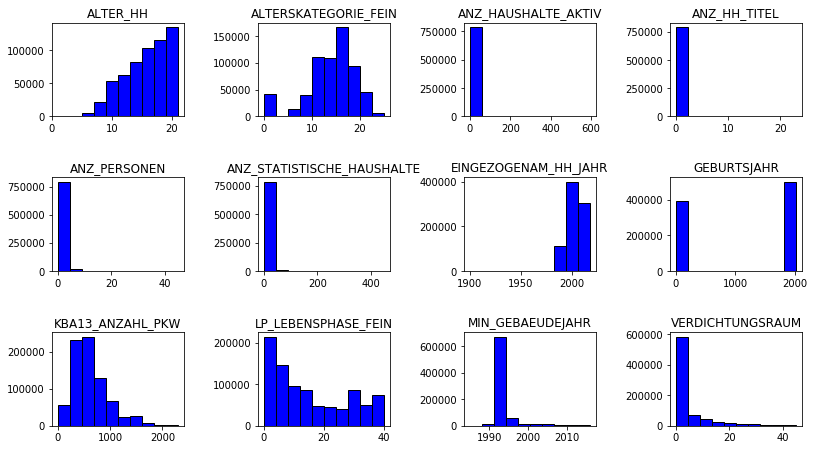

In [162]:
distribution_graphs(big_cat_columns)

In [334]:
#get the list of columns that doest have any nan values

na_list = azdias.columns[azdias.isna().any()].tolist()
col = azdias.columns.tolist()

# not_list = set(col)- set(na_list)

In [368]:
len(na_list)

265

In [361]:
#print the 0 value count of the not_list
zero_list =[]
for i in range(85):
    column = not_list[i]
    count = len(azdias[azdias[column]==0])
    if count >0:
        zero_list.append(column)
        print('{}---{}'.format(column, count))
    

D19_BANKEN_ANZ_12---831734
D19_BANKEN_ANZ_24---794100
D19_BANKEN_DIREKT---728811
D19_BANKEN_GROSS---785351
D19_BANKEN_LOKAL---874745
D19_BANKEN_REST---821760
D19_BEKLEIDUNG_GEH---809304
D19_BEKLEIDUNG_REST---692502
D19_BILDUNG---813156
D19_BIO_OEKO---854074
D19_BUCH_CD---622788
D19_DIGIT_SERV---857661
D19_DROGERIEARTIKEL---761014
D19_ENERGIE---829857
D19_FREIZEIT---790748
D19_GARTEN---851626
D19_GESAMT_ANZ_12---584797
D19_GESAMT_ANZ_24---505303
D19_HANDWERK---768381
D19_HAUS_DEKO---713100
D19_KINDERARTIKEL---749365
D19_KOSMETIK---745836
D19_LEBENSMITTEL---837914
D19_NAHRUNGSERGAENZUNG---852176
D19_RATGEBER---805071
D19_REISEN---736924
D19_SAMMELARTIKEL---802085
D19_SCHUHE---773024
D19_SONSTIGE---505953
D19_TECHNIK---630101
D19_TELKO_ANZ_12---857990
D19_TELKO_ANZ_24---826208
D19_TELKO_MOBILE---726804
D19_TELKO_REST---765973
D19_TIERARTIKEL---852220
D19_VERSAND_ANZ_12---637972
D19_VERSAND_ANZ_24---563818
D19_VERSAND_REST---734442
D19_VERSICHERUNGEN---654664
D19_VERSI_ANZ_12---821289
D19_

### Saving the Azdias file with all data convert

In [362]:
#save the part cleaned azsias file
azdias.to_csv("azdias_part_cleaned.zip",compression="zip")

### Filling missing values

In [3]:
azdias = pd.read_csv("azdias_part_cleaned.zip",compression='zip')

In [4]:
na_list = azdias.columns[azdias.isna().any()].tolist()

In [6]:
len(na_list)

265

In [365]:
# r = azdias['D19_BANKEN_ANZ_12'].mode(dropna=True).iloc[0]

In [5]:
for column in na_list:
     azdias[column].fillna(value= azdias[column].mode(dropna=True).iloc[0], inplace=True)

In [6]:
check_list = azdias.columns[azdias.isna().any()].tolist()
len(check_list)

0

### PCA

In [7]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 352 entries, Unnamed: 0 to ANZ_PERSONEN_2
dtypes: float64(265), int64(87)
memory usage: 2.3 GB


In [11]:
#open the cleaned files
azdias =pd.read_csv("azdias_cleaned.zip",compression="zip")


NameError: name 'read_csv' is not defined

In [13]:
customers =pd.read_csv("customers_cleaned.zip",compression="zip")

In [12]:
azdias.head()

,AKT_DAT_KL,ANZ_KINDER,ANZ_TITEL,ARBEIT,BALLRAUM,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,...,CAMEO_DEUG_2015_2,CAMEO_INTL_2015_2,ALTER_HH_2,ALTERSKATEGORIE_FEIN_2,EINGEZOGENAM_HH_JAHR_2,KBA13_ANZAHL_PKW_2,GEBURTSJAHR_2,ANZ_HAUSHALTE_AKTIV_2,ANZ_HH_TITEL_2,ANZ_PERSONEN_2
0,1.0,0.0,0.0,4.0,6.0,2.0,5.0,1.0,1.0,5.0,...,8.0,5.0,4,7,1,3,5,1,0,1
1,9.0,0.0,0.0,3.0,6.0,5.0,1.0,5.0,5.0,2.0,...,8.0,5.0,4,10,6,9,10,6,0,2
2,9.0,0.0,0.0,3.0,2.0,3.0,2.0,4.0,4.0,1.0,...,4.0,2.0,6,7,4,7,8,6,0,1
3,1.0,0.0,0.0,2.0,4.0,2.0,3.0,2.0,2.0,4.0,...,2.0,1.0,3,4,3,6,3,1,0,0
4,1.0,0.0,0.0,4.0,2.0,5.0,3.0,3.0,3.0,3.0,...,6.0,4.0,9,5,6,4,4,3,0,4


In [14]:
customers.head()

,AKT_DAT_KL,ANZ_KINDER,ANZ_TITEL,ARBEIT,BALLRAUM,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,...,CAMEO_DEUG_2015_2,CAMEO_INTL_2015_2,ALTER_HH_2,ALTERSKATEGORIE_FEIN_2,EINGEZOGENAM_HH_JAHR_2,KBA13_ANZAHL_PKW_2,GEBURTSJAHR_2,ANZ_HAUSHALTE_AKTIV_2,ANZ_HH_TITEL_2,ANZ_PERSONEN_2
0,1.0,0.0,0.0,1.0,3.0,5.0,4.0,1.0,1.0,5.0,...,1.0,1.0,1,2,1,10,1,1,0,2
1,9.0,0.0,0.0,3.0,6.0,6.0,5.0,1.0,1.0,5.0,...,2.0,2.0,2,2,7,10,1,1,0,3
2,1.0,0.0,0.0,3.0,7.0,2.0,5.0,2.0,2.0,5.0,...,5.0,3.0,1,1,2,4,1,1,0,1
3,1.0,0.0,0.0,1.0,7.0,2.0,5.0,1.0,1.0,5.0,...,4.0,2.0,1,1,2,8,1,1,0,0
4,1.0,0.0,0.0,3.0,3.0,6.0,4.0,3.0,3.0,3.0,...,7.0,4.0,9,5,2,5,4,5,0,4


In [ ]:
# #change the unamed column name to  delete 
# azdias.rename(columns={'Unnamed: 0': "delete"}, inplace= True)
# customers.rename(columns={'Unnamed: 0': "delete"}, inplace= True)


# azdias.drop(columns='delete', inplace=True)
# customers.drop(columns='delete', inplace=True)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
azdias_scaled = pd.DataFrame(scaler.fit_transform(azdias), columns=azdias.columns)
customers_scaled = pd.DataFrame(scaler.transform(customers), columns=customers.columns)



In [18]:
azdias_scaled.shape

(891221, 350)

In [19]:
customers_scaled.shape

(191652, 350)

In [21]:
azdias_scaled.head()

,AKT_DAT_KL,ANZ_KINDER,ANZ_TITEL,ARBEIT,BALLRAUM,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,...,CAMEO_DEUG_2015_2,CAMEO_INTL_2015_2,ALTER_HH_2,ALTERSKATEGORIE_FEIN_2,EINGEZOGENAM_HH_JAHR_2,KBA13_ANZAHL_PKW_2,GEBURTSJAHR_2,ANZ_HAUSHALTE_AKTIV_2,ANZ_HH_TITEL_2,ANZ_PERSONEN_2
0,0.0,0.0,0.0,0.375,0.833333,0.2,1.00,0.00,0.00,1.00,...,0.875,1.00,0.333333,0.666667,0.000000,0.222222,0.444444,0.000000,0.0,0.1
1,1.0,0.0,0.0,0.250,0.833333,0.8,0.00,1.00,1.00,0.25,...,0.875,1.00,0.333333,1.000000,0.555556,0.888889,1.000000,0.833333,0.0,0.2
2,1.0,0.0,0.0,0.250,0.166667,0.4,0.25,0.75,0.75,0.00,...,0.375,0.25,0.555556,0.666667,0.333333,0.666667,0.777778,0.833333,0.0,0.1
3,0.0,0.0,0.0,0.125,0.500000,0.2,0.50,0.25,0.25,0.75,...,0.125,0.00,0.222222,0.333333,0.222222,0.555556,0.222222,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.375,0.166667,0.8,0.50,0.50,0.50,0.50,...,0.625,0.75,0.888889,0.444444,0.555556,0.333333,0.333333,0.333333,0.0,0.4


In [22]:
#save the cleaned and scaled files
azdias_scaled.to_csv("azdias_scaled.csv", index= False)
customers_scaled.to_csv("customers_scaled.csv",index= False)

In [6]:
customers_scaled.to_csv("customers_csv_cleaned.csv")

In [5]:
azdias.shape

(891221, 350)

In [24]:
#model pca and plot the variance
from sklearn.decomposition import PCA
from scipy.interpolate import make_interp_spline, BSpline

def pca_variance(dataframe, components):  #function to model pca and plot the variance graph
    variance = []
    for value in components:
        pca_model = PCA(n_components=value)  #model the pca
        pca_model.fit_transform(dataframe)   
        variance.append(pca_model.explained_variance_ratio_.cumsum()[value-1])  #get the variace value
        print(pca_model.explained_variance_ratio_.cumsum()[value-1])
    print(variance)
    print(components)
        
    #plot the variace
    components_smooth = np.linspace(components[0], components[-1], 10)  #10 points are selected to get a smooth line
    spl = make_interp_spline(components, variance, k=3)  # type: BSpline
    varaince_smooth = spl(components_smooth)
    
    plt.scatter(components, variance)   #plot the variance as a scatter graph
    plt.plot(components_smooth, varaince_smooth)  #plot the smooth line
    plt.ylabel("Variance Covered")
    plt.xlabel("PCA Components")
    plt.title("Variance covered by PCA Components")
    plt.show()

In [ ]:
#apply pca
pca_components = [130, 150,170, 190]
pca_variance(azdias,pca_components)

0.2895337247977569
0.4907732092251974
0.7995186457742444
0.9457937358872053
[0.2895337247977569, 0.4907732092251974, 0.7995186457742444, 0.9457937358872053]
[1, 2, 4, 6]


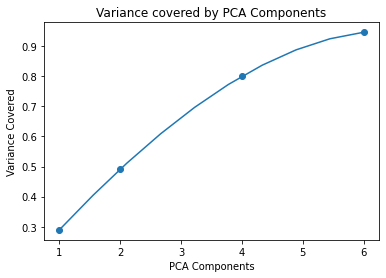

In [25]:
#testcode

np.random.seed(0)
my_matrix = np.random.randn(20, 8)
my_components = [1,2,4,6]

pca_variance(my_matrix,my_components)

# Actual Code
# components = [130, 150,170, 190]
# pca_variance(azdias,my_components)

In [26]:
pca_model = PCA(n_components=6)  #model the pca

pca_model.fit_transform(my_matrix) 

array([[ 0.58075918, -1.43726508,  2.15785115,  1.87629718,  0.40661325,
         1.46035681],
       [ 0.74481306, -0.77136051,  0.41736474,  0.24510881, -0.38418499,
         0.66645169],
       [-2.19095885,  2.39905579,  0.8629664 , -0.97123015,  0.34502631,
         0.70305443],
       [-0.29051164,  1.29037649,  1.05323612,  2.55226569, -0.90427936,
        -0.49860539],
       [ 0.3964533 ,  0.70719376, -1.92066444,  1.67735434, -0.98811885,
         0.12420891],
       [-1.25091609, -1.95864295, -2.02321803, -0.085776  , -1.13454813,
         0.12401149],
       [-0.1455379 , -0.87964991, -1.62975555, -1.05734285,  0.28754934,
         0.16537385],
       [-0.76589411,  0.64729934, -0.89539736, -0.34845882,  1.6421839 ,
         1.00330147],
       [-0.93821828,  0.16589374, -0.33126176, -0.82715168, -0.69870993,
         0.71432044],
       [-1.84615472,  0.89096837, -0.04727542,  0.65988392,  0.75361572,
        -0.39917798],
       [ 2.71355287,  2.31045011, -0.28106209, -0.

In [27]:
evar = pca_model.explained_variance_ratio_

In [28]:
evar

array([0.28953372, 0.20123948, 0.16888699, 0.13985844, 0.0945817 ,
       0.05169339])

In [29]:
singular_value_arr = pca_model.singular_values_

In [30]:
singular_value_arr

array([6.82391445, 5.68906103, 5.21173225, 4.74272934, 3.900206  ,
       2.88337755])

In [32]:
array = pca_model.components_

In [35]:
array

array([[-0.4420578 ,  0.45308484,  0.08239805, -0.07178993,  0.69789844,
         0.20640183,  0.23880689,  0.02575101],
       [ 0.10133056, -0.13945217,  0.16472139, -0.68824335, -0.17584481,
         0.50670671,  0.29732167, -0.30561398],
       [ 0.74067788,  0.45544775,  0.24986129,  0.14847329,  0.02491652,
         0.04599007,  0.32907943,  0.22013507],
       [ 0.3518729 , -0.57746486,  0.27195123,  0.08101976,  0.63542949,
         0.01578931, -0.17529138, -0.16568379],
       [ 0.08511002,  0.35993615,  0.22763572, -0.40872636,  0.05222211,
        -0.6019156 , -0.31324769, -0.42564462],
       [-0.03615384,  0.0118794 , -0.07694896,  0.47987278, -0.0763535 ,
        -0.04558022,  0.42553124, -0.757211  ]])

In [101]:
pc1 = list(np.around(np.array(array[0]),4))

In [102]:
pc2 = list(np.around(np.array(array[0]),4))

In [103]:
def find_index(features, original):
    maximum_index = []
    minimum_index = []
    print(original)
    while len(maximum_index)<3:
        maxi = max(features)
        maximum_index.append(original.index(maxi))
        features.remove(maxi)
    print(maximum_index)
    
    while len(minimum_index)<3:
        mini = min(features)
        minimum_index.append(original.index(mini))
        features.remove(mini)
    print(minimum_index)
    
    

In [104]:
find_index(pc1,pc2)

[-0.4421, 0.4531, 0.0824, -0.0718, 0.6979, 0.2064, 0.2388, 0.0258]
[4, 1, 6]
[0, 3, 7]


In [105]:
azdias.shape

(891221, 350)

In [106]:
column_names = azdias.columns

In [108]:
column_names[4]

'BALLRAUM'

### elbow plot for k menas

In [ ]:
azdias.max()   #max value of the azdias df.. confirm all values fall between 0-11

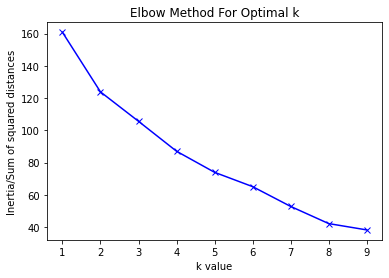

In [37]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
#     km = km.fit(azdias_transformed)
    km = km.fit(my_matrix)
    Sum_of_squared_distances.append(km.inertia_)

    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k value')
plt.ylabel('Inertia/Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [7]:
customer2 = pd.read_csv("customers_transformed.zip",compression='zip')

In [9]:
customer2.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,10.368617,24.140928,-9.525208,-3.351824,-6.696039,4.361234,1.519341,2.314293,4.235823,-0.106865,...,0.175573,1.013305,-1.234664,0.771851,-0.632157,0.015919,-0.058816,-0.223283,0.066385,-1.380752
1,-6.716024,1.611795,-2.975028,1.173348,-2.423523,4.833689,-0.598036,-4.658209,1.784060,4.422997,...,-0.296735,0.773429,-0.003205,0.139934,-0.689152,-0.015039,-0.756535,0.323086,0.567064,-0.773241
2,-6.216858,-1.642789,-13.829624,3.276657,-0.759865,2.447619,-2.368574,-1.164844,-6.579628,-4.562003,...,-0.317306,-0.895521,0.565599,0.123401,-0.457295,0.436767,2.686576,-0.022722,-2.203956,-0.495378
3,3.905874,16.636976,-8.527638,3.343554,-6.299354,-0.254655,1.089587,-1.104372,3.071782,6.297348,...,-0.534503,-0.507064,-1.920504,0.494049,0.431120,-0.424710,-0.183228,0.253611,-0.466910,0.793617
4,14.672621,-10.806546,10.578728,8.961554,8.362279,-4.605551,-1.167801,1.222740,5.392427,0.745709,...,-0.090267,0.850337,-0.434327,0.080259,-0.223848,-1.310616,-1.120845,-1.383128,-0.479761,0.696263


3 and 19101670.897752788 is done!
4 and 18473412.900836088 is done!
5 and 17998313.638482377 is done!
6 and 17625599.474804416 is done!
7 and 17364182.332419813 is done!
8 and 17133268.665771253 is done!
9 and 16958477.17330367 is done!
10 and 16801939.93121694 is done!
11 and 16666725.068677064 is done!
12 and 16552372.559374245 is done!
13 and 16432142.602628695 is done!
14 and 16344327.71689674 is done!
15 and 16260535.705382742 is done!
16 and 16189203.441679705 is done!
17 and 16106114.367119506 is done!

In [110]:
k = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

In [111]:
value = [19101670.897752788,18473412.900836088,17998313.638482377,17625599.474804416,17364182.332419813, 17133268.665771253,16958477.17330367,16801939.93121694,16666725.068677064,16552372.559374245,
         16432142.602628695,16344327.71689674, 16260535.705382742,16189203.441679705,16106114.367119506]

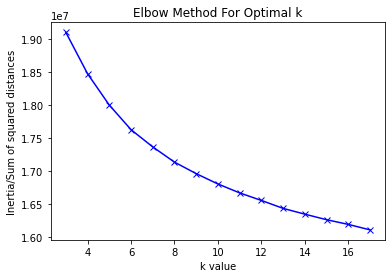

In [112]:
plt.plot(k, value, 'bx-')
plt.xlabel('k value')
plt.ylabel('Inertia/Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()
